In [1]:
# 1. Import necessary libraries and load the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from datetime import datetime

In [2]:
# 2. Load the dataset
df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Data Science/AnomaData - Capstone.csv')

In [3]:
# 3. Exploratory Data Analysis (EDA):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [4]:
# 3. Exploratory Data Analysis (EDA):
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


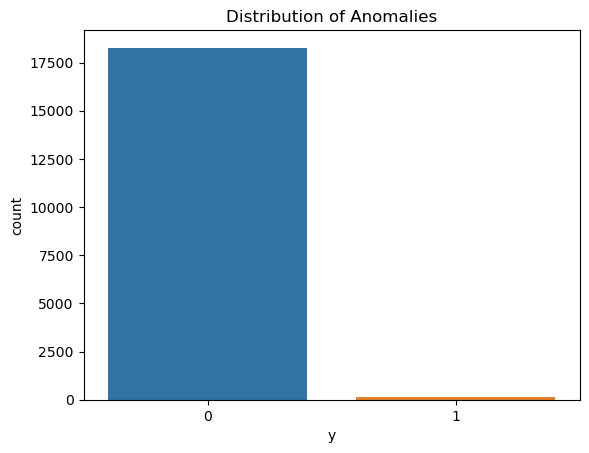

In [5]:
# 4. Data visualization to check for anomalies:
    # Check for class imbalance
sns.countplot(x='y', data=df)
plt.title('Distribution of Anomalies')
plt.show()


In [6]:
# 4. Data visualization to check for anomalies:
    # Drop non-numeric columns such as 'time' and any redundant columns like 'y.1'
df_cleaned = df.drop(columns=['time', 'y.1'])

In [46]:
# 4. Data visualization to check for anomalies:
    # Ensure that only numeric columns are selected
numeric_df = df_cleaned.select_dtypes(include=[np.number])

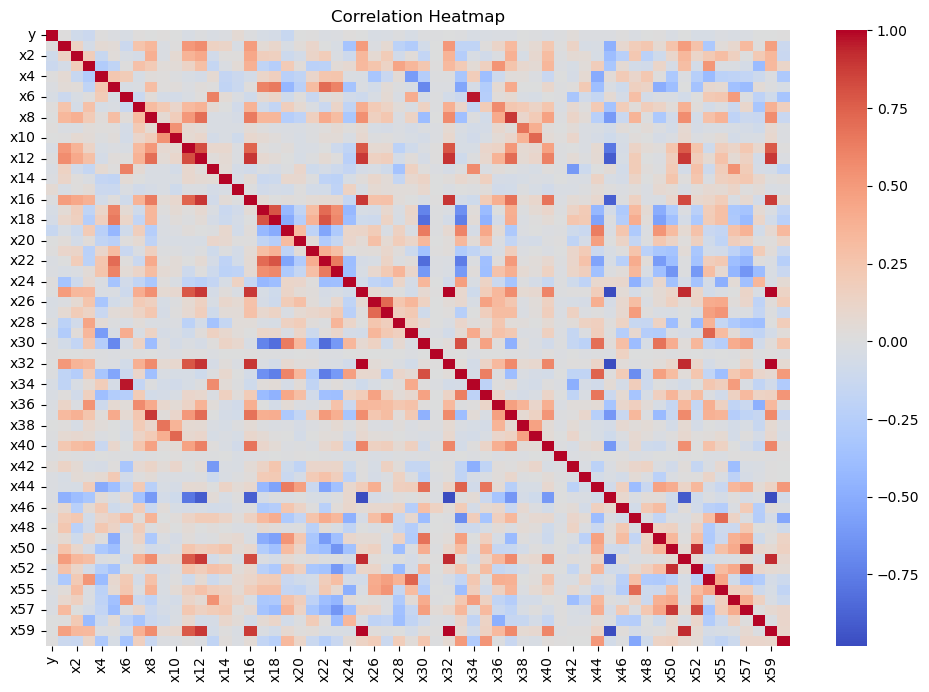

In [19]:
# 4. Data visualization to check for anomalies:
    # Plot the correlation heatmap for numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# 3. Data Cleaning:
    # . Fix the time column datatype:
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%y %H:%M')


In [21]:
# 3. Data Cleaning:
    # Handle missing values:
        # Checking missing values
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [23]:
# 3. Data Cleaning:
    # Handle missing values:
        # Imputing missing values
            # Separate numeric and non-numeric columns
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
non_numeric_columns = df_cleaned.select_dtypes(exclude=[np.number]).columns


In [24]:
# 3. Data Cleaning:
    # Handle missing values:
        # Imputing missing values
            # Apply imputation only on numeric columns
imputer = SimpleImputer(strategy='mean')
df_cleaned[numeric_columns] = imputer.fit_transform(df_cleaned[numeric_columns])

In [25]:
# For non-numeric columns, handle as required. For this case, we will leave them as they are.
# If 'time' or other non-numeric columns need to be processed, do that here.

In [26]:
# 3. Data Cleaning:
    # Handle missing values:
        # Imputing missing values
            # After imputing missing values, display the result
df_cleaned.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,0.0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,0.0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,0.0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,0.0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,0.0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105


In [28]:
# 3. Data Cleaning:
    # Handle missing values:
        # Imputing missing values
imputer = SimpleImputer(strategy='mean')
df_cleaned[numeric_columns] = imputer.fit_transform(df_cleaned[numeric_columns])


In [29]:
# 4. Feature Scaling
    # Scale the features to ensure they are on the same scale
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.drop(columns=['y'])), columns=df_cleaned.columns[:-1])

In [30]:
# 5. Train-Test Split
X = X_scaled
y = df_cleaned['y']

In [31]:
# 5. Train-Test Split
    # Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# 6. Handle Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [33]:
# 7. Model Selection and Training
    # Using RandomForest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [34]:
# 8. Predict on the test set
y_pred = rf.predict(X_test)

In [35]:
# 9. Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[3650    5]
 [  10   15]]


In [36]:
# 9. Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3655
         1.0       0.75      0.60      0.67        25

    accuracy                           1.00      3680
   macro avg       0.87      0.80      0.83      3680
weighted avg       1.00      1.00      1.00      3680



In [37]:
# 9. Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9959239130434783


In [38]:
# 10. Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [39]:
# 10. Hyperparameter Tuning using GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [40]:
# 10. Hyperparameter Tuning using GridSearchCV
    # Best model parameters
print('Best parameters found by GridSearchCV:', grid_search.best_params_)

Best parameters found by GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [42]:
# 11. Model Deployment (Saving the model)
    # Save the best model for future use
import joblib

best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, 'anomaly_detection_model.pkl')

['anomaly_detection_model.pkl']

In [43]:
# 11. Model Deployment (Saving the model)

print("Model saved as 'anomaly_detection_model.pkl'.")


Model saved as 'anomaly_detection_model.pkl'.
